In [1]:
#Cài đặt các thư viện
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

import warnings #avoid warning flash
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# read data 
df = pd.read_csv("E:/Year4/KhaiPhaDuLieu/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape #làm quen với các hàng và cột mà chúng ta đang xử lý - 768 hàng , 9 cột
df.columns #liệt kê tên các cột

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#Phương thức này in thông tin về DataFrame bao gồm dtype(kiểu dữ liệu của các cột), giá trị khác null và mức sử dụng bộ nhớ.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
#Missing Value Analysis
df.isnull().sum().sum()

0

In [9]:
df.isnull().values.any()

False

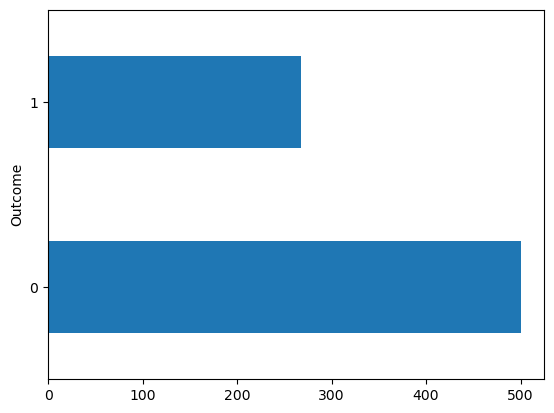

In [10]:
#Data Visualization
df["Outcome"].value_counts().plot.barh();

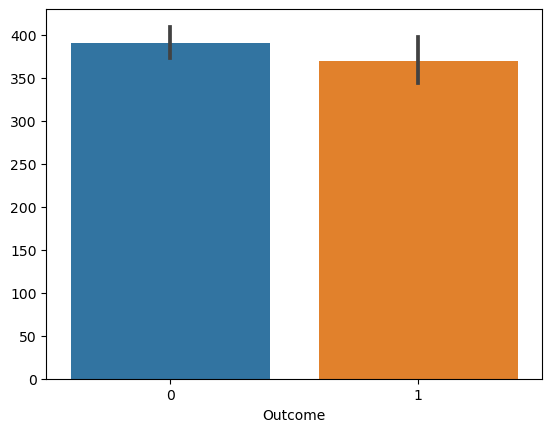

In [11]:
sns.barplot(x = "Outcome", y = df.Outcome.index, data= df);

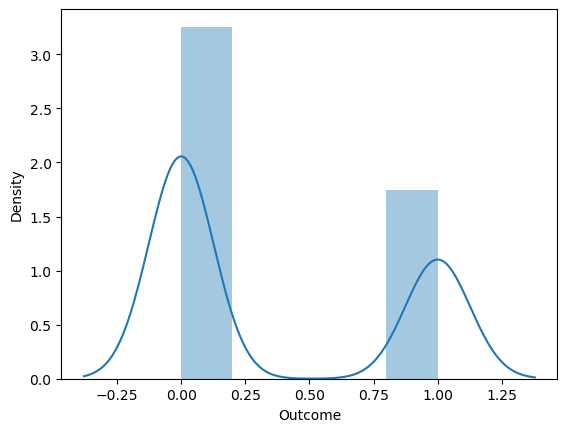

In [12]:
sns.distplot(df.Outcome);

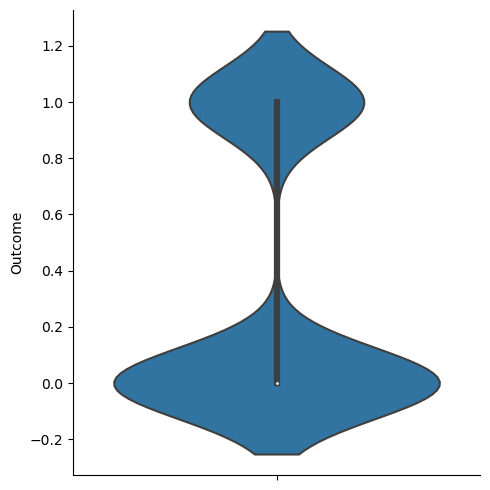

In [13]:
sns.catplot(y = "Outcome", kind = "violin", data = df);

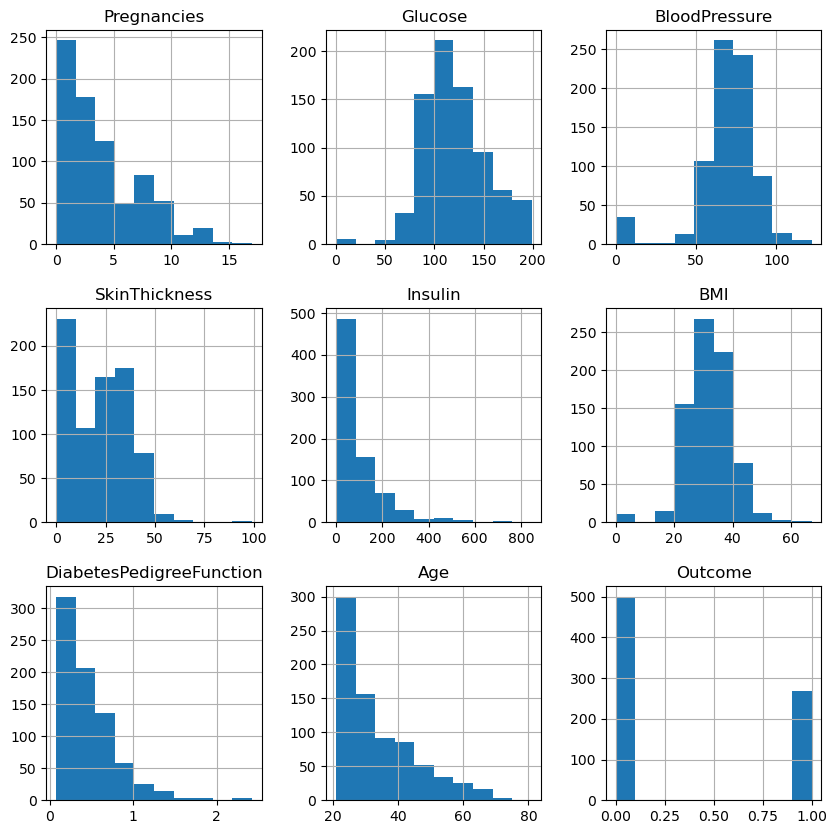

In [14]:
#biểu đồ tần suất (histogram) cho mỗi đặc trưng
df.hist(bins=10,figsize=(10,10))
plt.show()

In [15]:
#Data Preprocessing
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [18]:
df_num.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
#Outlier
for i in df_num:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (768,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (768, 9)
Old shape:  (768,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (768, 9)
Old shape:  (768,)
(array([], dtype=int64),) -- (array([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
       332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
       535, 589, 601, 604, 619, 643, 697, 703, 706], dtype=int64),)
New shape:  (733, 9)
Old shape:  (733,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (733, 9)
Old shape:  (733,)
(array([  7,  12, 105, 147, 179, 212, 219, 238, 274, 353, 392, 398, 463,
       557, 623, 663, 718], dtype=int64),) -- (array([], dtype=int64),)
KeyError: [  7  12 105 147 179 212 219 238 274 353 392 398 463 557 623 663 718] not found in axis
New shape:  (733, 9)
Old shape:  (733,)
(array([170], dtype=int64),) -- (array([  8, 139, 354, 652], dtype=int64),)
New shape:  (728, 9)
Old shape:  (728,)
(array([  4,  4

In [20]:
#Standardization
from sklearn import preprocessing 

In [21]:
preprocessing.scale(df_num)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [22]:
preprocessing.normalize(df_num)

array([[0.03355185, 0.82761219, 0.40262215, ..., 0.00350617, 0.27959871,
        0.00559197],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.00295683, 0.26114412,
        0.        ],
       [0.04039717, 0.9240852 , 0.32317734, ..., 0.00339336, 0.16158867,
        0.00504965],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.00131885, 0.16149234,
        0.        ],
       [0.00665291, 0.83826692, 0.39917472, ..., 0.00232187, 0.31268687,
        0.00665291],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.00249308, 0.18203439,
        0.        ]])

In [23]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [24]:
scaler.fit_transform(df_num)

array([[135.29411765, 174.3718593 , 159.01639344, ..., 123.44150299,
        148.33333333, 200.        ],
       [105.88235294, 142.71356784, 154.09836066, ..., 111.65670367,
        116.66666667, 100.        ],
       [147.05882353, 191.95979899, 152.45901639, ..., 125.36293766,
        118.33333333, 200.        ],
       ...,
       [129.41176471, 160.8040201 , 159.01639344, ..., 107.13065756,
        115.        , 100.        ],
       [105.88235294, 163.31658291, 149.18032787, ..., 111.57130658,
        143.33333333, 200.        ],
       [105.88235294, 146.73366834, 157.37704918, ..., 110.11955594,
        103.33333333, 100.        ]])

In [25]:
#Tách đặc trưng và nhãn
y = df["Outcome"] # Nhãn
X = df.drop(['Outcome'], axis=1) # Đặc trưng
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [26]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70% huấn luyện, 30% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Training data shape:  (502, 8)
Test data shape:  (216, 8)


In [27]:
from sklearn.svm import SVC

# Tạo mô hình SVM với kernel tuyến tính
svm_model = SVC(kernel='linear')

# Huấn luyện mô hình trên dữ liệu huấn luyện
svm_model.fit(X_train, y_train)

# Kiểm tra hiệu suất mô hình trên tập kiểm tra
accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy on test data: {accuracy:}")

Accuracy on test data: 0.7916666666666666


In [28]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
svm_model

SVC(kernel='linear')

In [29]:
y_pred = svm_model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.7916666666666666

In [31]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [32]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7962962962962963

In [33]:
# Dự đoán trên tập kiểm tra
y_pred_tuned = svc_tuned.predict(X_test)

# Đánh giá độ chính xác của mô hình đã điều chỉnh
from sklearn.metrics import accuracy_score
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Độ chính xác của mô hình đã điều chỉnh (C=5): {accuracy_tuned * 100:.2f}%")

Độ chính xác của mô hình đã điều chỉnh (C=5): 79.63%


In [34]:
from sklearn.metrics import classification_report

# In ra các chỉ số đánh giá: Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       138
           1       0.80      0.58      0.67        78

    accuracy                           0.80       216
   macro avg       0.80      0.75      0.76       216
weighted avg       0.80      0.80      0.79       216



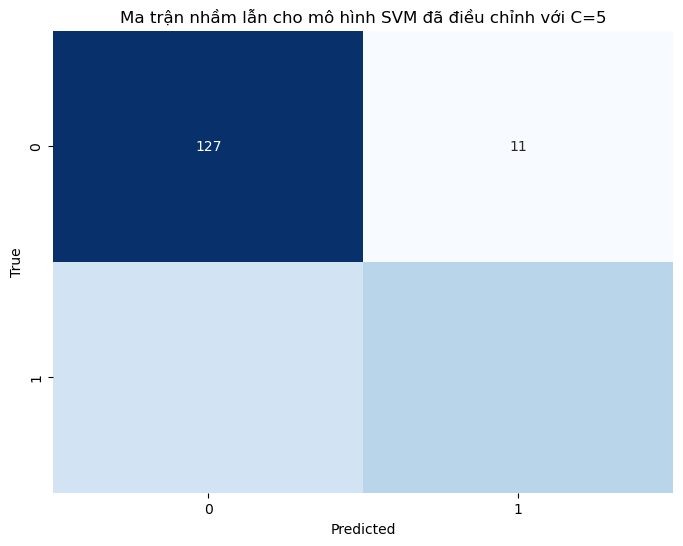

In [35]:
# Import thư viện vẽ ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred_tuned)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Ma trận nhầm lẫn cho mô hình SVM đã điều chỉnh với C=5")
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[127  11]
 [ 33  45]]


In [39]:
from sklearn.model_selection import GridSearchCV

# Xác định các tham số cần thử
parameters = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1]}

# Tạo đối tượng GridSearchCV để tìm giá trị tối ưu của C và gamma
grid_search = GridSearchCV(SVC(kernel='linear'), parameters, cv=5)

# Tìm tham số tối ưu
grid_search.fit(X_train, y_train)

# Hiển thị các tham số tốt nhất và độ chính xác tương ứng
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'C': 1, 'gamma': 'scale'}
Best Accuracy: 0.77


In [40]:
best_svm_model = grid_search.best_estimator_
y_pred_optimized = best_svm_model.predict(X_test)

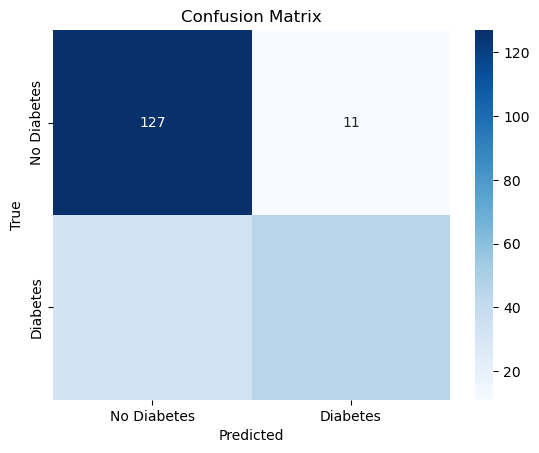

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

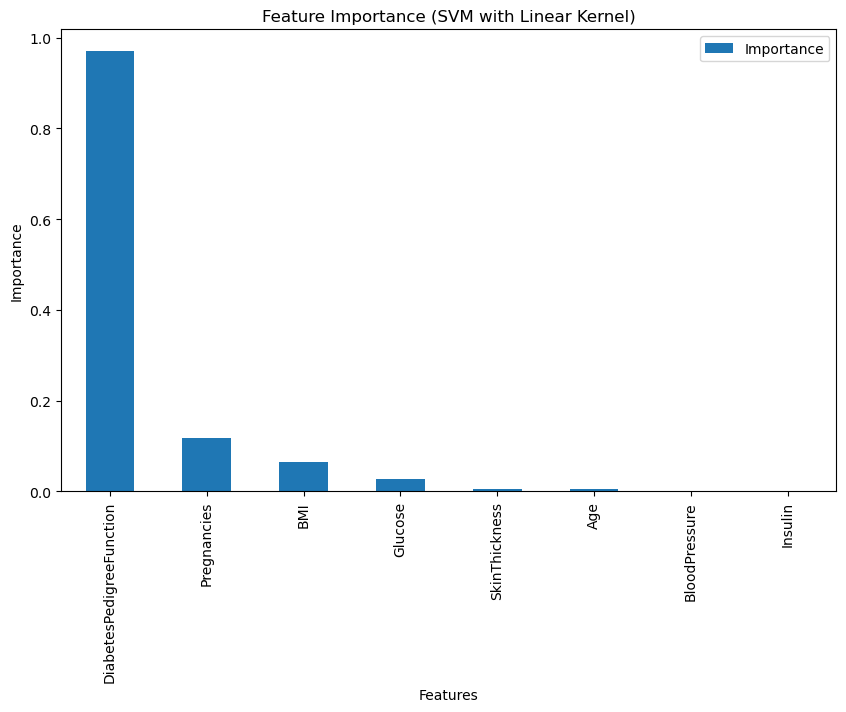

In [42]:
# Lấy trọng số của từng đặc trưng
importance = np.abs(svm_model.coef_[0])

# Tạo một DataFrame với tên đặc trưng và độ quan trọng
feature_importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])

# Sắp xếp theo độ quan trọng giảm dần
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ Feature Importance
feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance (SVM with Linear Kernel)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()